In [37]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
from tensorflow.keras.datasets import fashion_mnist

In [39]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## 數據集內容

In [40]:
len(x_train), len(x_test)

(60000, 10000)

In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)

### 轉一下我們的資料格式:

### (28,28) --> (28, 28, 1)

In [44]:
x_train = x_train.reshape(60000,28,28,1) / 255
x_test = x_test.reshape(10000,28,28,1) / 255

In [45]:
from tensorflow.keras.utils import to_categorical

In [46]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# dense：全連結神經層
# Conv2D的2D代表每個「記分板(kernal)」的維度 
# 如果輸入的是2D圖片(無論是灰階或是彩色)都是用Conv2D，輸入的是3D的立體圖片用Conv3D
# Conv2D輸入的是三維數據(width, height, channels)；Conv3D輸入的是四維數據(width, height, depth, channels)

### Step1. 打造函數學習機(CNN)

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), padding = "same", 
                 input_shape =(28,28,1), 
                 activation = "relu" )) 

### 輸出16個 28x28 矩陣
### 事實上是(28,28,16)

In [50]:
model.add(MaxPooling2D(pool_size = (2,2)))# (14,14,16) 原本為28x28,16張記分板，每個都切成2x2, 剩下14x14

In [51]:
model.add(Conv2D(32, (3,3), padding='same',
                activation='relu')) # output = (14,14,32)

In [52]:
model.add(MaxPooling2D(pool_size = (2,2)))# output (7,7,32)

In [53]:
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))

In [54]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(54,activation = "relu"))

In [57]:
model.add(Dense(10,activation = "softmax")) #10個數字, softmax 加起來為1

## 看一下我們的神經網路

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [60]:
model.compile(loss = "mse", optimizer = SGD(lr = 0.080),
             metrics = ["accuracy"])

### Step2. fit

In [62]:
model.fit(x_train, y_train, batch_size = 128, epochs = 12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 404us/sample - loss: 0.0896 - accuracy: 0.1492
Epoch 2/12
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0882 - accuracy: 0.2946
Epoch 3/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0803 - accuracy: 0.4208
Epoch 4/12
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0480 - accuracy: 0.6551
Epoch 5/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0393 - accuracy: 0.7174
Epoch 6/12
60000/60000 [==============================] - 24s 407us/sample - loss: 0.0359 - accuracy: 0.7435
Epoch 7/12
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0339 - accuracy: 0.7590
Epoch 8/12
60000/60000 [==============================] - 24s 402us/sample - loss: 0.0321 - accuracy: 0.7732
Epoch 9/12
60000/60000 [==============================] - 24s 403us/sample - loss: 0.0307 - accuracy: 0.7

### Step3.預測

In [63]:
result = model.predict_classes(x_test)

In [68]:
def my_predict(n):
    print('我的CNN預測是:', class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = "Greens" )

我的CNN預測是: Trouser


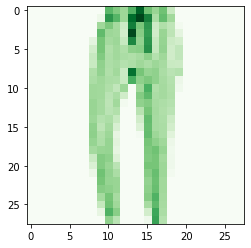

In [69]:
my_predict(80) 

In [70]:
from ipywidgets import interact_manual

In [71]:
interact_manual(my_predict, n = (0,9999)) 

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [72]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 151us/sample - loss: 0.0276 - accuracy: 0.8064


In [73]:
loss,acc = score

In [74]:
print("測試資料的正確率:", acc)

測試資料的正確率: 0.8064


## 用不同數字再做一次看會有甚麼變化

In [78]:
model = Sequential()

In [79]:
model.add(Conv2D(12,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(24, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(48, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [80]:
#建立兩層Dense,神經元設為30,10
model.add(Dense(40, activation='relu'))

In [81]:
model.add(Dense(10, activation='relu'))

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 24)        2616      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 24)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 48)          10416     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 48)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 432)              

In [83]:
model.compile(loss='mse', optimizer=SGD(lr=0.088),metrics=['accuracy'])

In [84]:
model.fit(x_train, y_train, batch_size=120, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0732 - accuracy: 0.4463
Epoch 2/15
60000/60000 [==============================] - 37s 609us/sample - loss: 0.0611 - accuracy: 0.5328
Epoch 3/15
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0582 - accuracy: 0.5458
Epoch 4/15
60000/60000 [==============================] - 37s 615us/sample - loss: 0.0566 - accuracy: 0.5540
Epoch 5/15
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0554 - accuracy: 0.5610
Epoch 6/15
60000/60000 [==============================] - 37s 615us/sample - loss: 0.0546 - accuracy: 0.5669
Epoch 7/15
60000/60000 [==============================] - 37s 619us/sample - loss: 0.0539 - accuracy: 0.5734
Epoch 8/15
60000/60000 [==============================] - 37s 621us/sample - loss: 0.0534 - accuracy: 0.5782
Epoch 9/15
60000/60000 [==============================] - 37s 622us/sample - loss: 0.0530 - accuracy: 0.5

In [85]:
result = model.predict_classes(x_test)

In [86]:
def my_predict(n):
    print('我的CNN預測是:', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = "Greens" )

In [87]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 258us/sample - loss: 0.0516 - accuracy: 0.5903


In [ ]:
loss,acc = score

In [ ]:
print("測試資料的正確率:", acc)

### 把model儲存起來

In [ ]:
model.save("myCNNmodel.h5")

In [ ]:
做三層channel filter改成12,24,48
建立兩層Dense,神經元設為40,10
把學習率改為0.088
batch_size改為130, 訓練次數為15次
